# Zillow Value Prediction

## Planning

### Goals: 
- This project aims to predict the values of single unit properties using property data during the "hot months" (in terms of real estate demand) of May and June in 2017.

### Hypotheses:
- $H_0$: Value is not predictable by any features in the dataset
- $H_a$: Value is predicted best by number of beds
- $H_a$: Value is predicted best by number of baths
- $H_a$: Value is predicted best by sq feet
- $H_a$: Value is predicted best by all features in dataset
- $H_a$: Engineered features will improve predictions

### Features in model:
- Predicted (dependent): 
    1. Value
- Predictor (independent): 
    2. square feet
    3. number of bedrooms
    4. number of bathrooms
- Engineered: 
    5. is_extra (property has basement, deck, AC, garage, fireplace, pool, and/or hot tub)
    6. size_ratio (square feet of home / square feet of lot)
    7. sq_feet_proxy6 (square feet of home / (avg sq_ft of neighborhood / (number of homes in neighborhood / avg sq_ft of neighborhood))

## Acquire Data

In [1]:
# required imports
import acquire
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.3f}'.format

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
sql = acquire.sql_all
zillow = acquire.get_data_from_sql(sql)

In [3]:
original_shape = zillow.shape
original_shape

(15036, 62)

In [4]:
zillow.describe()

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,id,logerror
count,15036.000,15036.000,3982.000,15.000,11.000,15036.000,15036.000,9572.000,14990.000,107.000,...,22.000,15010.000,15036.000,15036.000,15036.000,15035.000,527.000,14990.000,15036.000,15036.000
mean,13038193.776,1516020.134,2.454,7.600,761.455,2.322,3.308,6.303,2.329,66.000,...,1.000,201770.852,543447.664,2016.000,342025.711,6618.897,14.053,60496815243067.836,42505.746,0.014
std,3927137.922,859732.680,3.859,3.924,444.817,1.025,0.951,1.718,1.020,0.000,...,0.000,263323.456,735415.287,0.000,528709.744,8513.788,1.497,210466117687.743,6477.676,0.177
min,10712101.000,349.000,1.000,2.000,280.000,0.000,0.000,1.000,1.000,66.000,...,1.000,129.000,10504.000,2016.000,2250.000,51.260,8.000,60371011101011.000,1248.000,-4.454
25%,11503285.750,778689.250,1.000,7.000,497.000,2.000,3.000,5.000,2.000,66.000,...,1.000,79100.750,198633.500,2016.000,79646.250,2707.960,14.000,60374013122008.000,37033.250,-0.027
50%,12584581.000,1537406.500,1.000,7.000,640.000,2.000,3.000,6.000,2.000,66.000,...,1.000,135661.500,385174.000,2016.000,224738.500,4775.900,15.000,60376210044002.000,42558.500,0.005
75%,14143421.750,2260507.750,1.000,7.000,865.500,3.000,4.000,8.000,3.000,66.000,...,1.000,234918.500,645241.250,2016.000,423519.500,7683.940,15.000,60590423301006.500,48039.750,0.037
max,167687839.000,2982270.000,13.000,21.000,1809.000,11.000,12.000,12.000,11.000,66.000,...,1.000,7893568.000,23858374.000,2016.000,16350601.000,276797.830,15.000,61110091001004.000,53501.000,3.176


In [5]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Data columns (total 62 columns):
parcelid                        15036 non-null int64
id                              15036 non-null int64
airconditioningtypeid           3982 non-null float64
architecturalstyletypeid        15 non-null float64
basementsqft                    11 non-null float64
bathroomcnt                     15036 non-null float64
bedroomcnt                      15036 non-null float64
buildingclasstypeid             0 non-null object
buildingqualitytypeid           9572 non-null float64
calculatedbathnbr               14990 non-null float64
decktypeid                      107 non-null float64
finishedfloor1squarefeet        1295 non-null float64
calculatedfinishedsquarefeet    15012 non-null float64
finishedsquarefeet12            14969 non-null float64
finishedsquarefeet13            0 non-null object
finishedsquarefeet15            0 non-null object
finishedsquarefeet50            1295 non-

In [6]:
zillow.head()

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id,logerror,transactiondate
0,11289917,2061546,1.000,nan,nan,2.000,3.000,None,6.000,2.000,...,136104.000,2016.000,27214.000,2319.900,Y,15.000,60379005013002.000,1248,-0.362,2017-06-23
1,11705026,1834372,nan,nan,nan,1.000,2.000,None,6.000,1.000,...,35606.000,2016.000,23624.000,543.690,None,nan,60372322001007.000,1772,-0.146,2017-06-30
2,14269464,1923117,nan,nan,nan,3.000,4.000,None,nan,3.000,...,880456.000,2016.000,445569.000,9819.720,None,nan,60590639072031.000,2028,0.021,2017-06-01
3,11389003,2121349,nan,nan,nan,2.000,3.000,None,6.000,2.000,...,614000.000,2016.000,449000.000,7673.190,None,nan,60377030021015.000,3273,-0.325,2017-06-01
4,11967869,2093710,nan,nan,nan,1.000,2.000,None,5.000,1.000,...,274237.000,2016.000,191821.000,3267.470,None,nan,60371851001001.000,3429,-0.006,2017-06-29


## Prepare Data
### Goals for this stage:
- Address missing & null values, data integrity issues, etc.

### Extraneous Features and Null Values:
1. Columns with lees than 90% entries aren't useful, so they will be engineered into new features or dropped from the df

In [7]:
15036 * 0.9

13532.4

> All columns with less than 90% entries:
    - To be engineered:
        * airconditioningtypeid    
        * basementsqft    
        * decktypeid
        * fireplacecnt
        * garagecarcnt    
        * hashottuborspa
        * poolcnt    
        * regionidneighborhood        
        * fireplaceflag
    - To be dropped:
        * architecturalstyletypeid
        * buildingclasstypeid
        * buildingqualitytypeid
        * finishedfloor1squarefeet
        * finishedsquarefeet13
        * finishedsquarefeet15
        * finishedsquarefeet50
        * finishedsquarefeet6
        * garagetotalsqft
        * heatingorsystemtypeid
        * poolsizesum
        * pooltypeid10
        * pooltypeid2
        * pooltypeid7
        * propertyzoningdesc
        * storytypeid
        * threequarterbathnbr
        * typeconstructiontypeid
        * unitcnt
        * yardbuildingsqft17
        * yardbuildingsqft26
        * numberofstories
        * taxdelinquencyflag
        * taxdelinquencyyear

In [8]:
zillow = zillow.drop(columns=[
    'architecturalstyletypeid', 'buildingclasstypeid', 
    'buildingqualitytypeid', 'finishedfloor1squarefeet', 
    'finishedsquarefeet13', 'finishedsquarefeet15',
    'finishedsquarefeet50', 'finishedsquarefeet6',
    'garagetotalsqft', 'heatingorsystemtypeid', 'poolsizesum',
    'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
    'propertyzoningdesc', 'storytypeid', 'threequarterbathnbr',
    'typeconstructiontypeid', 'unitcnt', 'yardbuildingsqft17',
    'yardbuildingsqft26', 'numberofstories', 
    'taxdelinquencyflag', 'taxdelinquencyyear'])

2. Null Values Handling:
> Because I am using the square footage to calculate size_ratio, I will need to drop all null values from the calculatedfinishedsquarefeet column

In [9]:
zillow = zillow.dropna(subset=['calculatedfinishedsquarefeet', 'lotsizesquarefeet'])

   > Now I can fill all null values with 0

In [10]:
zillow = zillow.fillna(0)

> Properties with zero beds or baths aren't very useful, since my model requires them to predict the value, so I'll drop them. Also, 0 values in the columns I will use for division are going to give me inf values, so I will drop them, too.

In [11]:
zillow = zillow[zillow.bathroomcnt != 0]
zillow = zillow[zillow.bedroomcnt != 0]
zillow = zillow[zillow.taxamount != 0]
zillow = zillow[zillow.taxvaluedollarcnt != 0]
zillow = zillow[zillow.calculatedfinishedsquarefeet != 0]
zillow = zillow[zillow.lotsizesquarefeet != 0]

3. Duplicated id columns
> I will make parcelid the index, and drop the other columns with id, log error and transaction date since they have served their purpose

In [12]:
zillow = zillow.set_index('parcelid')
zillow = zillow.drop(columns=['id', 'id', 'logerror', 'transactiondate'])

4. Tax information
> Some columns are related to the tax information, so I will drop those to not accidentally use them in the model

In [13]:
zillow = zillow.drop(columns=[
    'structuretaxvaluedollarcnt', 'assessmentyear', 
    'landtaxvaluedollarcnt'])

In [14]:
row_delta = original_shape[0] - zillow.shape[0]
col_delta = original_shape[1] - zillow.shape[1]

print(f"I dropped {row_delta} rows and {col_delta} columns with these actions.")

I dropped 144 rows and 32 columns with these actions.


In [15]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14892 entries, 11289917 to 11464823
Data columns (total 30 columns):
airconditioningtypeid           14892 non-null float64
basementsqft                    14892 non-null float64
bathroomcnt                     14892 non-null float64
bedroomcnt                      14892 non-null float64
calculatedbathnbr               14892 non-null float64
decktypeid                      14892 non-null float64
calculatedfinishedsquarefeet    14892 non-null float64
finishedsquarefeet12            14892 non-null float64
fips                            14892 non-null float64
fireplacecnt                    14892 non-null float64
fullbathcnt                     14892 non-null float64
garagecarcnt                    14892 non-null float64
hashottuborspa                  14892 non-null float64
latitude                        14892 non-null float64
longitude                       14892 non-null float64
lotsizesquarefeet               14892 non-null float64
p

### Feature Engineering:

1. Columns to be engineered due to less than 90% entries:
        * airconditioningtypeid    
        * basementsqft    
        * decktypeid
        * fireplacecnt
        * garagecarcnt    
        * hashottuborspa
        * poolcnt    
        * regionidneighborhood        
        * fireplaceflag

In [16]:
zillow['has_garage'] = np.where(zillow.garagecarcnt > 0, '1', '0').astype(int)
zillow['has_base'] = np.where(zillow.basementsqft > 0, '1', '0').astype(int)
zillow['has_AC'] = np.where(zillow.airconditioningtypeid > 0, '1', '0').astype(int)
zillow['has_fire'] = np.where(zillow.fireplaceflag > 0, '1', '0').astype(int)
zillow['has_pool'] = np.where(zillow.poolcnt > 0, '1', '0').astype(int)
zillow['has_deck'] = np.where(zillow.decktypeid > 0, '1', '0').astype(int)
zillow['has_hottub'] = np.where(zillow.hashottuborspa > 0, '1', '0').astype(int)

zillow['is_extra'] = (zillow.has_garage + zillow.has_base + zillow.has_AC +
                     zillow.has_fire + zillow.has_pool + zillow.has_deck + 
                     zillow.has_hottub)

zillow = zillow.drop(columns=[
    'basementsqft','fireplacecnt', 'fireplaceflag', 'poolcnt',
    'decktypeid', 'hashottuborspa', 'airconditioningtypeid',
    'garagecarcnt'])

In [17]:
zillow.is_extra.value_counts()

1    6571
0    5400
2    2332
3     549
4      39
5       1
Name: is_extra, dtype: int64

> I also think the roomcnt column could be more informative if added to the beds and baths columns, so I'll make a new feature called all_rooms and add those columns together, and see how they perform

In [18]:
zillow['all_rooms'] = zillow.bathroomcnt + zillow.bedroomcnt + zillow.roomcnt

> To deal with the regionidneighborhood column, I've developed a way to abstract out the avg square footage of the homes in each neighborhood, then using that number as a divisor with the square footage of each home

In [19]:
thing = pd.DataFrame(zillow.regionidneighborhood.value_counts())
thing = thing.rename(columns={'regionidneighborhood': 'num_houses'})
thing['avg_sq_ft'] = zillow.groupby('regionidneighborhood')['calculatedfinishedsquarefeet'].agg('median')
thing['factor'] = thing.avg_sq_ft / (thing.num_houses / thing.avg_sq_ft)

thing.head()

,num_houses,avg_sq_ft,factor
0.000,9448,1715.000,311.307
48570.000,138,2115.000,32414.674
27080.000,130,1807.500,25131.202
118208.000,121,1242.000,12748.463
113455.000,113,2047.000,37081.496


In [20]:
zillow = zillow.merge(thing[['factor']], left_on='regionidneighborhood', right_index=True).reset_index()
zillow['sq_feet_proxy6'] = zillow.calculatedfinishedsquarefeet / zillow.factor
zillow = zillow.drop(columns=['regionidneighborhood'])

2. Find out where properties are located
    * Use fips column to generate county and state names
        - fips data is found here [link](https://www.nrcs.usda.gov/wps/portal/nrcs/detail/national/home/?cid=nrcs143_013697)

In [21]:
zillow.fips.value_counts()

6037.000    9517
6059.000    4084
6111.000    1291
Name: fips, dtype: int64

In [22]:
zillow['county'] = np.where(zillow.fips == 6037, 'Los_Angeles',
                           np.where(zillow.fips == 6059, 'Orange', 
                                   'Ventura'))
zillow['state'] = 'CA'

> Now drop the fips column, since it has outlived its usefulness

In [23]:
zillow = zillow.drop(columns=['fips'])

3. Acquire tax rate by dividing the value of the property by the tax amount, then drop tax information from the df

In [24]:
zillow['tax_rate'] = zillow.taxamount / zillow.taxvaluedollarcnt
zillow = zillow.drop(columns=['taxamount'])

4. Calculate size_ratio column by dividing the square feet of the home by the square feet of the lot, and drop the rest of the sq_feet columns

In [25]:
zillow['size_ratio'] = (zillow.calculatedfinishedsquarefeet / zillow.lotsizesquarefeet).round(4)
zillow = zillow.drop(columns=[
    'finishedsquarefeet12'])

5. Make a new column with the age of the property, and drop the yearbuilt column

In [26]:
zillow['age'] = (2017 - zillow.yearbuilt).astype(int)
zillow = zillow.drop(columns=['yearbuilt'])

6. Drop the columns calculatedbathnbr and fullbathcnt since it is a copy of the bathroomcnt column

In [27]:
zillow = zillow.drop(columns=['calculatedbathnbr', 'fullbathcnt'])

5. Drop all columns with categorical data that aren't relevant, like latitude, longitude, and region info

In [28]:
zillow = zillow.drop(columns=[
    'latitude', 'longitude', 'propertycountylandusecode',
    'propertylandusetypeid', 'rawcensustractandblock', 
    'regionidcity', 'regionidcounty', 'regionidzip', 
    'censustractandblock'])

6. Rename columns to be more understandable

In [29]:
zillow = zillow.rename(columns={
    "bathroomcnt": "baths",
    "bedroomcnt": "beds",
    "calculatedfinishedsquarefeet": "home_sf",
    "lotsizesquarefeet": "lot_sf",
    "taxvaluedollarcnt": "value"})

In [30]:
zillow.columns.tolist()

['parcelid',
 'baths',
 'beds',
 'home_sf',
 'lot_sf',
 'roomcnt',
 'value',
 'has_garage',
 'has_base',
 'has_AC',
 'has_fire',
 'has_pool',
 'has_deck',
 'has_hottub',
 'is_extra',
 'all_rooms',
 'factor',
 'sq_feet_proxy6',
 'county',
 'state',
 'tax_rate',
 'size_ratio',
 'age']

In [31]:
zillow.head()

,parcelid,baths,beds,home_sf,lot_sf,roomcnt,value,has_garage,has_base,has_AC,...,has_hottub,is_extra,all_rooms,factor,sq_feet_proxy6,county,state,tax_rate,size_ratio,age
0,11289917,2.000,3.000,1458.000,8284.000,0.000,136104.000,0,0,1,...,0,2,5.000,311.307,4.683,Los_Angeles,CA,0.017,0.176,47
1,14269464,3.000,4.000,2541.000,4975.000,0.000,880456.000,1,0,0,...,0,1,7.000,311.307,8.162,Orange,CA,0.011,0.511,14
2,11389003,2.000,3.000,1650.000,7300.000,0.000,614000.000,0,0,0,...,0,0,5.000,311.307,5.300,Los_Angeles,CA,0.012,0.226,68
3,14236060,2.000,3.000,1668.000,6774.000,7.000,196483.000,1,0,0,...,0,1,12.000,311.307,5.358,Orange,CA,0.012,0.246,41
4,14365030,2.500,3.000,1653.000,3090.000,0.000,605000.000,1,0,0,...,0,1,5.500,311.307,5.310,Orange,CA,0.010,0.535,25


### Plot distributions of variables  

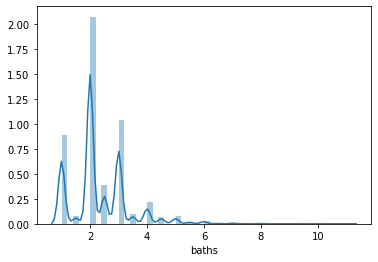

In [32]:
sns.distplot(zillow.baths)

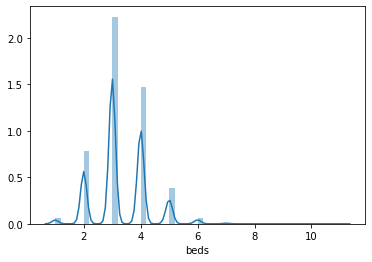

In [33]:
sns.distplot(zillow.beds)

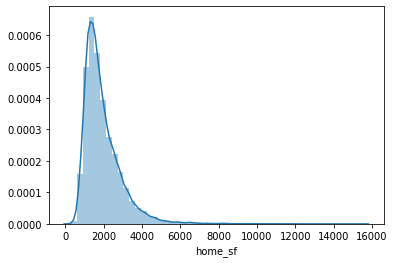

In [34]:
sns.distplot(zillow.home_sf)

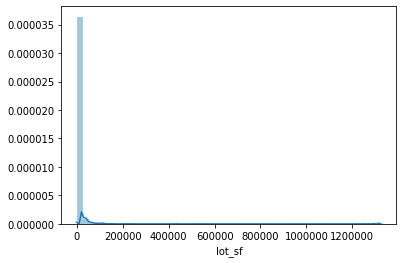

In [35]:
sns.distplot(zillow.lot_sf)

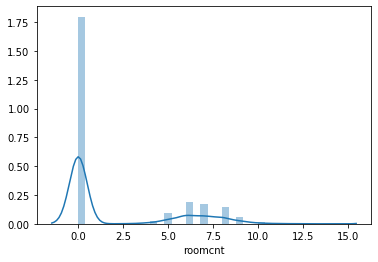

In [36]:
sns.distplot(zillow.roomcnt)

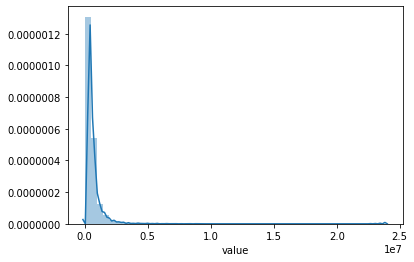

In [37]:
sns.distplot(zillow.value)

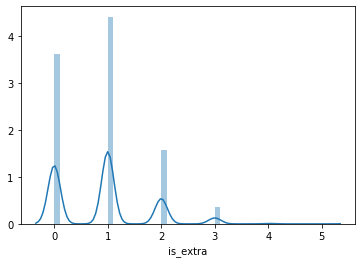

In [38]:
sns.distplot(zillow.is_extra)

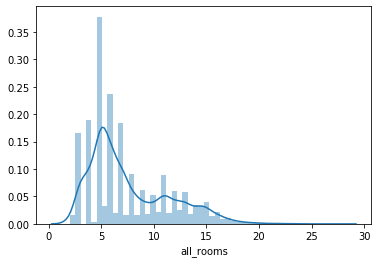

In [39]:
sns.distplot(zillow.all_rooms)

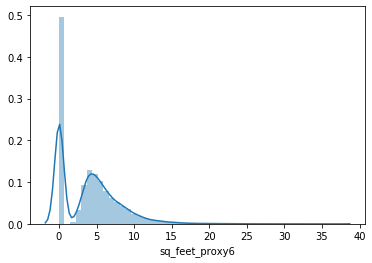

In [40]:
sns.distplot(zillow.sq_feet_proxy6)

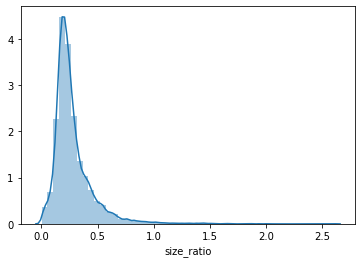

In [41]:
sns.distplot(zillow.size_ratio)

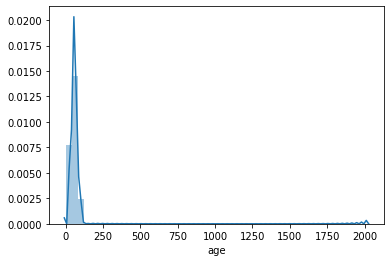

In [42]:
sns.distplot(zillow.age)

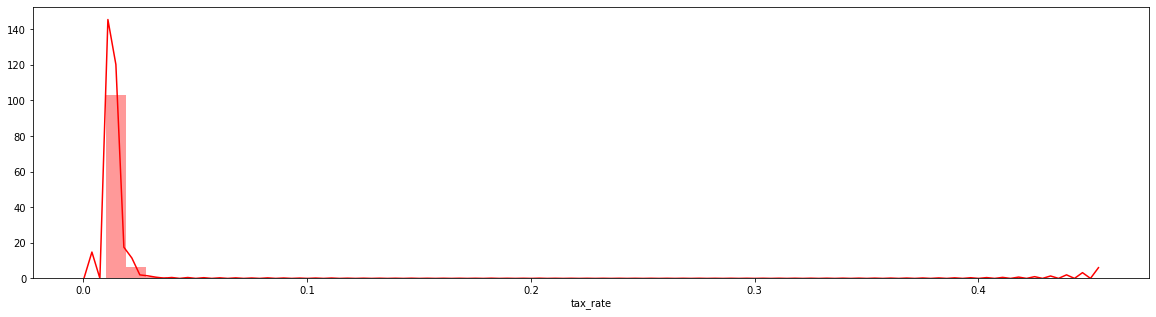

In [43]:
plt.figure(figsize=(20,5))
sns.distplot(zillow[zillow.county == 'Los_Angeles'].tax_rate, color='red')

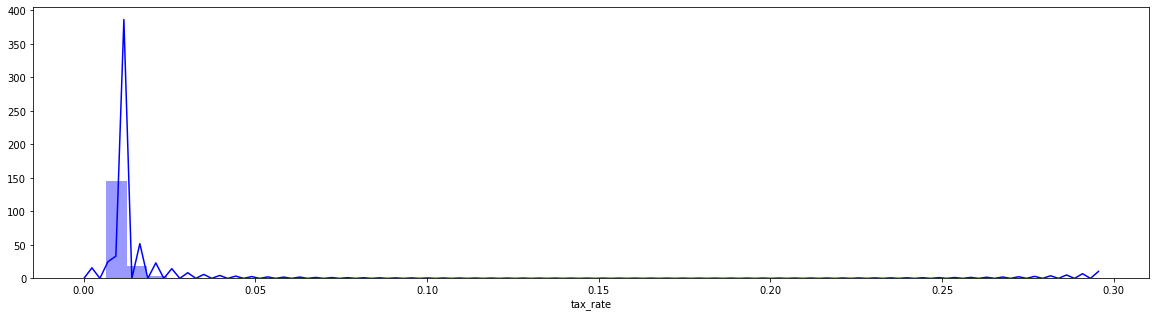

In [44]:
plt.figure(figsize=(20,5))
sns.distplot(zillow[zillow.county == 'Ventura'].tax_rate, color='blue')

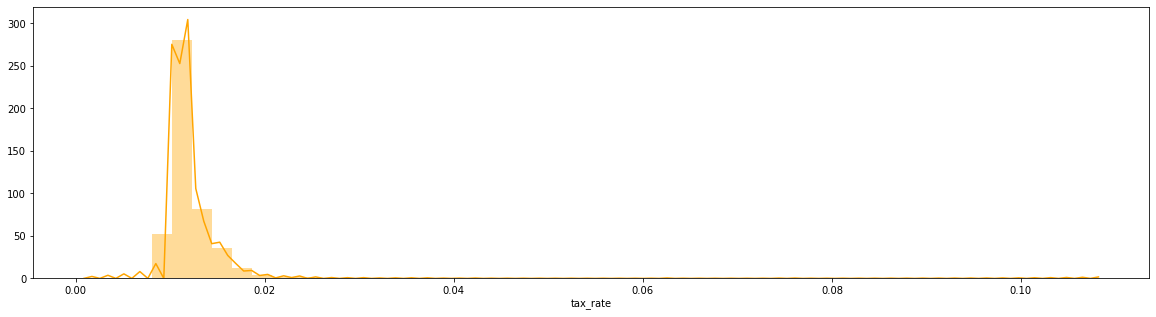

In [45]:
plt.figure(figsize=(20,5))
sns.distplot(zillow[zillow.county == 'Orange'].tax_rate, color='orange')

## Exploration

(21.0, 0.0)

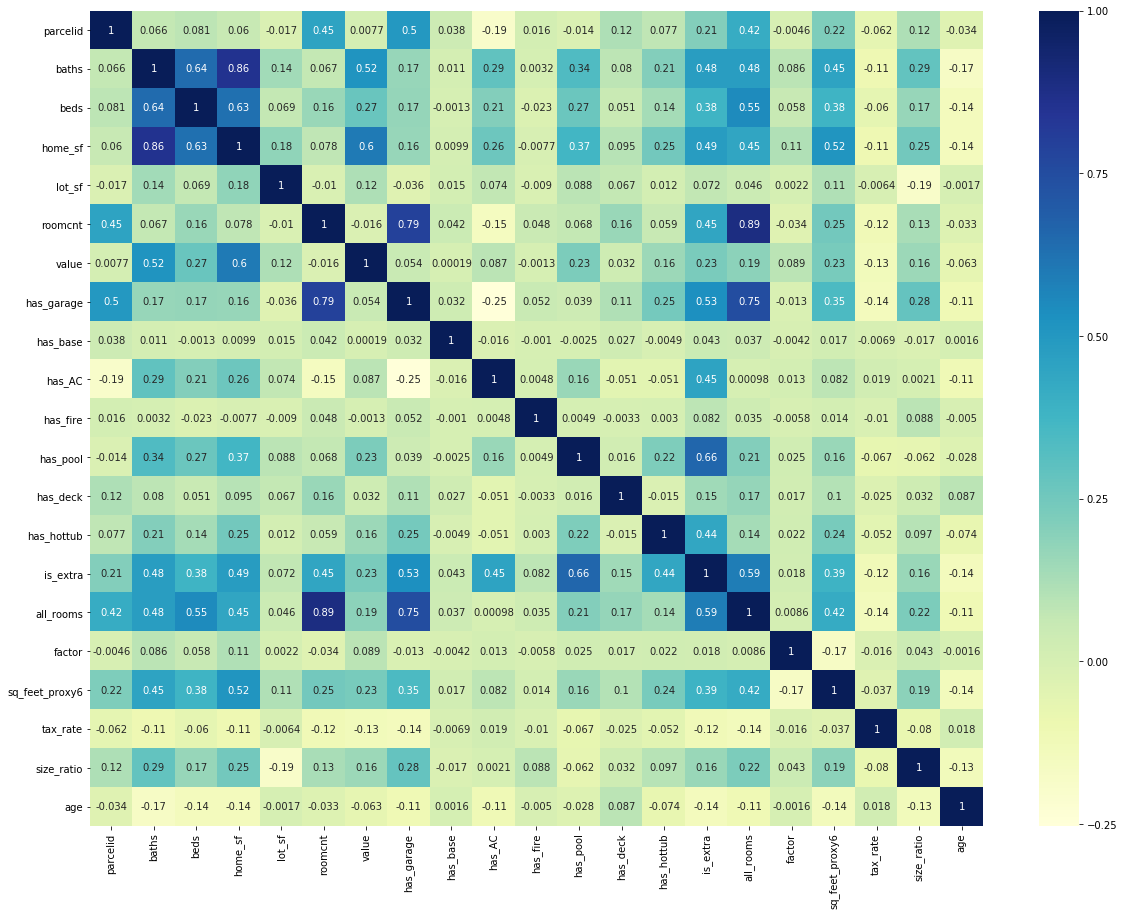

In [46]:
plt.figure(figsize=(20,15))
corr = zillow.corr()
ax = sns.heatmap(corr, annot=True, cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [47]:
# This vis works, but takes alot of processing power and time, so only run it if you want to wait
#sns.pairplot(zillow, kind="reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws':{'alpha':0.5}})

### Save this file as a csv before proceeding to next notebook for Modeling

In [48]:
zillow.to_csv('zillow_wt.csv')